6.4 PART 2

OUTLINE: 
1. Importing the libraries and data needed
2. Hypothesis
3. Data cleaning section
4. Data preperation for regression analysis 
5. Actual Regression analysis
6. Summary

In [2]:
# 1. This is importing the libraries that is needed
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# What this does is ensure the graphs that get created are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
# creating the file path
path = r'C:\Users\rdpor\anaconda3\Scripts\CAREER FOUNDRY ACHIEVMENT 6\Prepared Data\chocolate_bar_ratings_cleaned3.csv'

1. Importing the data set that was cleaned and saved from 6.4 part 1

In [5]:
# importing the file that was from 6.4 part 1 
choc_bar_ratings_df_clean4= pd.read_csv(r'C:\Users\rdpor\anaconda3\Scripts\CAREER FOUNDRY ACHIEVMENT 6\Prepared Data\choc_bar_ratings_df_clean4.csv')

2. HYPOTHESIS
This is going back over a previous hypothesis.
Chocolate bars with the highest rating have a Middle Level amount of cocoa in them.
 ("<0.6: "Low percent")
  (>= 0.6 and < 0.75: "Mid percent),
   (>=0.75 and <1: "High percent"),
(1= "Completely Cocoa")

3.  DATA CLEANING SECTION

In [6]:
# Assessing the situation (data frame)
choc_bar_ratings_df_clean4.shape

(2657, 13)

In [7]:
# Assessing the situation (data frame)
choc_bar_ratings_df_clean4.head()

,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Most Memorable Characteristics,Rating,Num_of_Ingredients,Specific Ingredients,Cocoa Level,Ingredient Level,Rating Level
0,Manoa,U.S.A.,2012.0,Liberia,"Liberia, batch 174",0.76,"molassses, intense, off, herb",3.25,3,"B,S,C",0,3,Mid-level
1,Manoa,U.S.A.,2012.0,U.S.A.,"Hawai'i Island, Hamakua, Hawaiian Crown, b. 176",0.76,"oily, tangy, fruit, earthy",2.75,3,"B,S,C",0,3,Mid-level
2,Manoa,U.S.A.,2012.0,Peru,"Piura, batch 173",0.76,"banana, menthol, medicinal",3.00,3,"B,S,C",0,3,Mid-level
3,Manoa,U.S.A.,2012.0,U.S.A.,"O'ahu Island, Winward,Maunawili district, b. 151",0.68,"molasses, sweet, cocoa",3.25,3,"B,S,C",0,3,Mid-level
4,Nanea,U.S.A.,2013.0,U.S.A.,Criollo Blend,0.72,"sandy, spicy, earthy",3.50,0,NaN,0,0,Mid-level


In [8]:
# Assessing the situation (data frame)
choc_bar_ratings_df_clean4.describe()

,Review Date,Cocoa Percent,Rating,Num_of_Ingredients,Ingredient Level
count,2656.000000,2657.000000,2657.000000,2657.000000,2657.000000
mean,2014.750753,0.716131,3.197591,2.928867,2.928867
std,4.220790,0.055345,0.445871,1.037975,1.037975
min,2006.000000,0.420000,0.000000,0.000000,0.000000
25%,2012.000000,0.700000,3.000000,2.000000,2.000000
50%,2015.000000,0.700000,3.250000,3.000000,3.000000
75%,2018.000000,0.740000,3.500000,4.000000,4.000000
max,2023.000000,1.000000,4.000000,6.000000,6.000000


In [9]:
# What this code is doing is checking for duplicates again
duplicates_df = choc_bar_ratings_df_clean4.duplicated()

In [10]:
# what this code is doing is checking for the duplicates in this new 'duplicates_df'
duplicates_df

0       False
1       False
2       False
3       False
4       False
        ...  
2652    False
2653    False
2654    False
2655    False
2656    False
Length: 2657, dtype: bool

Double checking for significant values 

C:\Users\rdpor\AppData\Local\Temp\ipykernel_29068\2868455586.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(choc_bar_ratings_df_clean4['Num_of_Ingredients'], bins=25)


<Axes: xlabel='Num_of_Ingredients', ylabel='Density'>

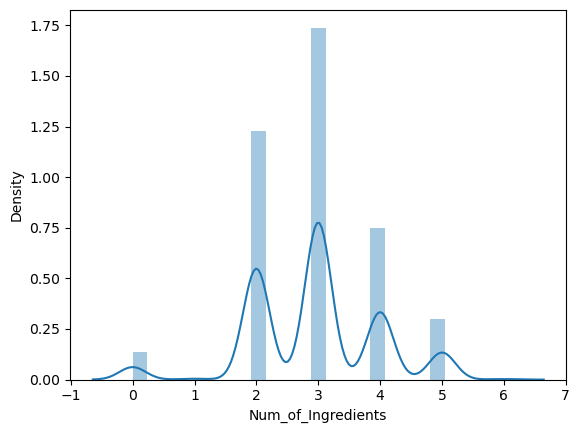

In [11]:
# Put simply this code is creating a histogram 
# with a kernel density plot overlay to show the 
# distribution of the number of ingredients in 
# chocolate bars (Num_of_Ingredients). Each bar
# in the histogram represents a range of ingredient 
# counts, and the KDE provides a smoothed curve
# illustrating the overall distribution pattern.
# It helps the viewer understand how frequently different 
# numbers of ingredients appear in the dataset.

sns.distplot(choc_bar_ratings_df_clean4['Num_of_Ingredients'], bins=25)

In [12]:
# What this code is doing is running a summary of the statistics
choc_bar_ratings_df_clean4['Num_of_Ingredients'].agg(['mean','min', 'median', 'max',])

mean      2.928867
min       0.000000
median    3.000000
max       6.000000
Name: Num_of_Ingredients, dtype: float64

In [13]:
# to put it simply, this function takes a group of data,
# finds its mode (most common value), and returns that value.
# It's particularly useful when working with grouped data, 
# such as when using the groupby operation in pandas.

def mode(group):return group.mode().iloc[0]  

In [15]:
# summary of the statistics again ***Note maybe delete this 
choc_bar_ratings_df_clean4['Num_of_Ingredients'].agg(['mean','min', 'median', 'max',mode])

mean      2.928867
min       0.000000
median    3.000000
max       6.000000
mode      3.000000
Name: Num_of_Ingredients, dtype: float64

4.  DATA PREPERATION FOR REGRESSION ANALYSIS

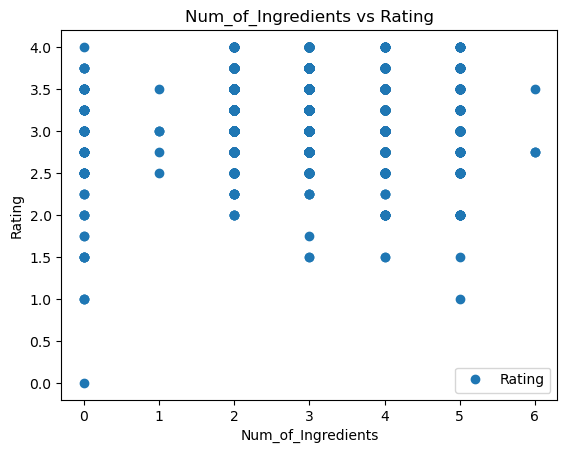

In [16]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
# Trying to understand how the cocoa level (independent variable) relates to the rating (dependent variable)
choc_bar_ratings_df_clean4.plot(x = 'Num_of_Ingredients', y='Rating',style='o') 
plt.title('Num_of_Ingredients vs Rating')  
plt.xlabel('Num_of_Ingredients')  
plt.ylabel('Rating')
plt.show()

In [17]:
# switching the nan values so that they are a '0' in the for the Rating column
choc_bar_ratings_df_clean4['Rating'].fillna(0).astype(int) 

0       3
1       2
2       3
3       3
4       3
       ..
2652    3
2653    2
2654    2
2655    2
2656    0
Name: Rating, Length: 2657, dtype: int32

In [18]:
# What this code is doing is reshaping the variables into NumPy arrays and putting them into separate objects.

X = choc_bar_ratings_df_clean4['Num_of_Ingredients'].values.reshape(-1,1)
y = choc_bar_ratings_df_clean4['Rating'].values.reshape(-1,1)

In [19]:
# checking x values
X

array([[3],
       [3],
       [3],
       ...,
       [2],
       [2],
       [0]], dtype=int64)

In [20]:
#checking y values
y

array([[3.25],
       [2.75],
       [3.  ],
       ...,
       [2.75],
       [2.5 ],
       [0.  ]])

In [21]:
# What this line of code is doing is splitting 
# the data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

5.  Actual Regression Analysis

In [22]:
# What this line of code is doing is creating a regression object.
# Also, this is the regression object, which will be fit onto the training set.

regression = LinearRegression()  

In [23]:
# this is MODEL CREATION: 
        
regression = LinearRegression()


In [24]:
# THIS IS MODEL TRAINING: 
#  After creating the model,what needs to happen is train
# it on the data using the fit method. This
# is where the model learns from the provided data.
regression.fit(X_train, y_train)


LinearRegression()

In [25]:
# THIS IS MODEL PREDICTION: Once the model is trained, you can
# use the predict method to make predictions on new or unseen data.
y_predicted = regression.predict(X_test)


In [26]:
# What this code is doing is predicting the values of y using X.

y_predicted = regression.predict(X_test)

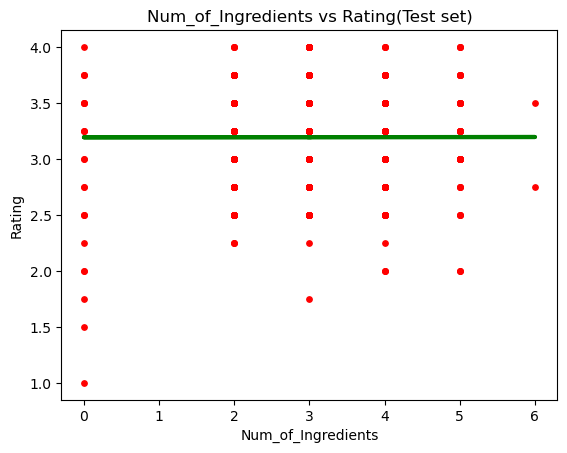

In [27]:
# test
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='red', s = 15)
plot_test.plot(X_test, y_predicted, color='green', linewidth =3)
plot_test.title('Num_of_Ingredients vs Rating(Test set)')
plot_test.xlabel('Num_of_Ingredients')
plot_test.ylabel('Rating')
plot_test.show()

In [28]:
# In simpler terms:
# RMSE tells us how far, on average, the model's predictions are from the actual values.
# R-squared tells us how well the model explains the variability in the actual values.
# Remember: Smaller RMSE values and higher R-squared values are indicative of a better-performing model.


rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted)

In [29]:
# what this code is doing is print the model summary statistics. 
# at the same time it's doing an evaluation of the performance of the particular model

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00043628]]
Mean squared error:  0.18061598719425462
R2 score:  -0.001131399629636931


There is a slight negative slope: 
This negative slope indicates a negative relationship.  
As the 'Num_of_Ingredients' (x) rises, 
"Rating" (y) goes down. 
The MSE: is not really a big number.  
The prediction could be close to the acual results but the R2 score 
is quite small (almost zero)
but the negative number (-0.001131399629636931)is perhaps not the best model fit. 

In [30]:
# these are the y_predicted values 
y_predicted

array([[3.19315424],
       [3.19359052],
       [3.19315424],
       [3.19315424],
       [3.19315424],
       [3.19315424],
       [3.19315424],
       [3.19271796],
       [3.19315424],
       [3.19359052],
       [3.19315424],
       [3.1940268 ],
       [3.19271796],
       [3.19271796],
       [3.19315424],
       [3.19271796],
       [3.19359052],
       [3.19271796],
       [3.19315424],
       [3.19359052],
       [3.19315424],
       [3.1940268 ],
       [3.19315424],
       [3.19271796],
       [3.19271796],
       [3.1940268 ],
       [3.19359052],
       [3.19315424],
       [3.19315424],
       [3.19359052],
       [3.19359052],
       [3.19315424],
       [3.19315424],
       [3.1918454 ],
       [3.19315424],
       [3.19315424],
       [3.19315424],
       [3.19315424],
       [3.19315424],
       [3.19315424],
       [3.19271796],
       [3.19315424],
       [3.1918454 ],
       [3.19315424],
       [3.19315424],
       [3.1918454 ],
       [3.19359052],
       [3.193

In [31]:
# This code is creating a dataframe that is comparing the actual and predicted values of y covering the regression data.

Regression_data_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

NameError: name 'data' is not defined

 ***Note: the predictions could be better

This next part is comparing how exactly the regression fits into the training set. 

In [32]:
# This code is predicting the X_train

y_predicted_train = regression.predict(X_train)

In [33]:
# In simpler terms, these metrics help one understand
# how accurate and explanatory the predictive model is.
# we want low RMSE and high R2 for a well-performing model in the most ideal situation.

rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [34]:
# What these print statements are doing is providing insights into the model's coefficients and its predictive performance.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00043628]]
Mean squared error:  0.20652043028060182
R2 score:  1.0072448024533998e-06


The slope has not changed.  Based off of looking at the new analysis compared to the first one
we can see the slope is still [[0.00043628]]
The Mean Squared Error (RMSE): has increased by approximately .0259
The R2 score originally was -0.00113 and now has increased to 1.0072

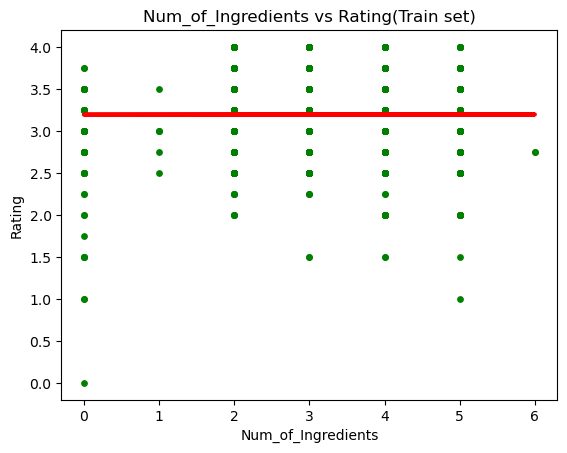

In [35]:
# This is a scatterplot of the training set.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Num_of_Ingredients vs Rating(Train set)')
plot_test.xlabel('Num_of_Ingredients')
plot_test.ylabel('Rating')
plot_test.show()

In [36]:
Regression_data_df2 = pd.DataFrame({'Actual': y_train.flatten(), 'Predicted': y_predicted_train.flatten()})
data.head(25)

NameError: name 'data' is not defined

There's some significant results, but nothing to alarming.  

6. Summary
There's multiple things to consider. 
Similarily compared to part 1, it's important to be aware of potential bias.  
The rating that the chocolate bars get, ultimately comes down to the individual 
tasting for each bar and what that experience is like for the individual tasting the bar. 
The results so far for the analysis indicate that the most highly rated bars (most delicious) have 
mid level amount of cocoa.  Also, the chart shows that when there are more ingredients that go into 
the bars, the rating very slightly decreases. Ultimately, however the model might need improvements 
because it does not seem to be the best predictor of actual tangible results concerning the number 
of ingredients with how the effect ratings.  There will be further analysis to test more of the 
hypothesis in further detail to come. 

In [37]:
# note: this is running the code and exporting it to the folder, however
# the 'clean4' can get confusing so be aware
choc_bar_ratings_df_clean4.to_csv(os.path.join(r'C:\Users\rdpor\anaconda3\Scripts\CAREER FOUNDRY ACHIEVMENT 6\Prepared Data\choc_bar_ratings_df_clean5.csv'), index=False)

In [38]:
choc_bar_ratings_df_clean4

,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Most Memorable Characteristics,Rating,Num_of_Ingredients,Specific Ingredients,Cocoa Level,Ingredient Level,Rating Level
0,Manoa,U.S.A.,2012.0,Liberia,"Liberia, batch 174",0.76,"molassses, intense, off, herb",3.25,3,"B,S,C",0,3,Mid-level
1,Manoa,U.S.A.,2012.0,U.S.A.,"Hawai'i Island, Hamakua, Hawaiian Crown, b. 176",0.76,"oily, tangy, fruit, earthy",2.75,3,"B,S,C",0,3,Mid-level
2,Manoa,U.S.A.,2012.0,Peru,"Piura, batch 173",0.76,"banana, menthol, medicinal",3.00,3,"B,S,C",0,3,Mid-level
3,Manoa,U.S.A.,2012.0,U.S.A.,"O'ahu Island, Winward,Maunawili district, b. 151",0.68,"molasses, sweet, cocoa",3.25,3,"B,S,C",0,3,Mid-level
4,Nanea,U.S.A.,2013.0,U.S.A.,Criollo Blend,0.72,"sandy, spicy, earthy",3.50,0,NaN,0,0,Mid-level
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2652,Bahen & Co.,Australia,2012.0,Madagascar,Sambirano,0.80,"unrefined, flat, grassy",3.00,2,"B,S",0,2,Mid-level
2653,Mast Brothers,U.S.A.,2012.0,Blend,Madagascar,0.75,"gritty, overly tart, sour",2.50,2,"B,S",0,2,Mid-level
2654,Mast Brothers,U.S.A.,2012.0,Venezuela,Chuao,0.75,"gritty, sour, sweet",2.75,2,"B,S",0,2,Mid-level
2655,Bahen & Co.,Australia,2012.0,Brazil,Bahia,0.70,"chalky, intense, chemical",2.50,2,"B,S",0,2,Mid-level
